### Instructions
In this assignment, the dataset has changed to predict bpm.  The lecture has applied a KNN regression to predict bmp based on loudness and tested the difference between using weights and no weights.  With a 5 fold cross validation, the unweighted accuracy was -0.18 (+/- 0.66) and the weighted accuracy was 0.11 (+/- 0.94).  This assignment is to try and improve the lecture's model by adding the other duration.  

### 1 - Load the Data
The data are 3 sets of lists for duration of a piece in seconds, the loudness, and bpm (beats per min).  

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [2]:
music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

### 2 - Building the Model
As usual, the first step to building the model is to identify your target variable (bpm) and features (everything except bpm) and split it into train and test sets.  I want to find out the optimal number of neighbors for both the weighted and unweighted models, so I will test a range of numbers using a for loop and plot the resulting scores.

In [3]:
k_range = range(2, 15)
X = music.drop(['bpm'], axis = 1)
Y = music['bpm']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
# Store scores for unweighted model and varying K
scores_nonweight_lst =[]
for i in k_range:
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    score = cross_val_score(knn, X_train, y_train, cv=3)
    scores_nonweight_lst.append(score.mean())

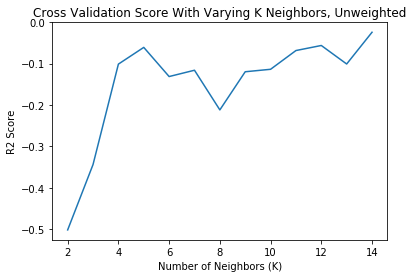

In [5]:
# Plot scores for unweighted model and varying K
plt.plot(k_range, scores_nonweight_lst)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R2 Score')
plt.title('Cross Validation Score With Varying K Neighbors, Unweighted')

In [6]:
np.argmax(scores_nonweight_lst) + 2

14

In [7]:
# Store scores for weighted model and varying K
scores_weight_lst =[]
for i in k_range:
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_w.fit(X_train, y_train)
    score = cross_val_score(knn_w, X_train, y_train, cv=3, scoring ='r2')
    scores_weight_lst.append(score.mean())


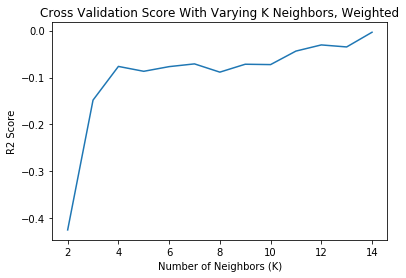

In [8]:
# Plot scores for weighted model and varying K
plt.plot(k_range, scores_weight_lst)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R2 Score')
plt.title('Cross Validation Score With Varying K Neighbors, Weighted')

In [9]:
np.argmax(scores_weight_lst) +2

14

For both the weighted and unweighted model, the best scores come from when K = 5.  I will rerun each model with cross validation on the whole dataset.  Normally at this point I would use the test set, but to compare my score with the lecture's score, I will follow their process.  

In [10]:
knn = neighbors.KNeighborsRegressor(n_neighbors=14)
knn.fit(X, Y)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=14, weights='distance')
knn_w.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=14, p=2,
          weights='distance')

In [11]:
score = cross_val_score(knn, X, Y, cv=3)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=3)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.07 (+/- 0.10)
Weighted Accuracy: 0.03 (+/- 0.14)


With K=14 and 3 fold cross validation, I get an unweighted and weighted accuracy of -0.07 and 0.03.  These scores are still terrible, but they are better than the ones from the lecture and with smaller variance.  

### 2.1 - Scaling the Features
Each feature and the target variable in the dataset has a different range.  For example, duration ranges from ~100-400 whereas loudness only ranges from ~5-50.  Scaling the features could both improve the models and reduce the high variance.

In [12]:
music.describe()

,duration,loudness,bpm
count,30.000000,30.000000,30.000000
mean,222.966667,21.900000,89.333333
std,92.743057,11.645185,15.563736
min,102.000000,4.000000,60.000000
25%,168.500000,13.250000,75.750000
50%,197.500000,19.500000,90.000000
75%,261.250000,27.750000,101.500000
max,403.000000,51.000000,120.000000


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_scaled = scaler.fit_transform(X)


C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
# Store scores for unweighted model and varying K
scores_nonweight_lst =[]

for i in k_range:
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=3)
    scores_nonweight_lst.append(score.mean())

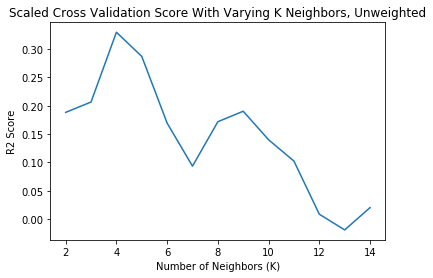

In [16]:
# Plot scores for unweighted model and varying K
plt.plot(k_range, scores_nonweight_lst)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R2 Score')
plt.title('Scaled Cross Validation Score With Varying K Neighbors, Unweighted')

In [17]:
np.argmax(scores_nonweight_lst)+2

4

In [18]:
# Store scores for weighted model and varying K
scores_weight_lst =[]
for i in k_range:
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_w.fit(X_train_scaled, y_train)
    score = cross_val_score(knn_w, X_train_scaled, y_train, cv=3, scoring ='r2')
    scores_weight_lst.append(score.mean())


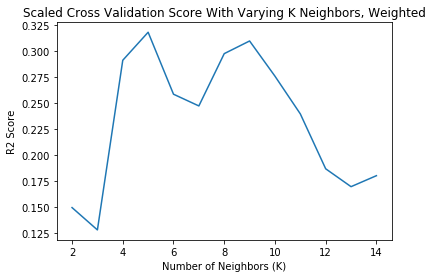

In [19]:
# Plot scores for weighted model and varying K
plt.plot(k_range, scores_weight_lst)
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R2 Score')
plt.title('Scaled Cross Validation Score With Varying K Neighbors, Weighted')

In [20]:
np.argmax(scores_weight_lst)+2

5

In [21]:
knn = neighbors.KNeighborsRegressor(n_neighbors=4)
knn.fit(X_scaled, Y)

knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_w.fit(X_scaled, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='distance')

In [22]:
score = cross_val_score(knn, X_scaled, Y, cv=3)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X_scaled, Y, cv=3)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.04 (+/- 0.29)
Weighted Accuracy: 0.13 (+/- 0.02)


With K = 4 and 5 with 3 fold cross validation for the unweighted and weighed models respectively, the accuracies are -0.04 and 0.13.  Both these scores are higher than the models from the unscaled version.  This time however, the variance in the unweighted model is much higher than the weighted model.